# Plot Tropical Cyclone Counts on a Map

Let's plot the number of Tropical Cyclones between 1842 and 2021.

We expect most tropical cyclones to be located in the vicinity shown in this __[article](https://mynasadata.larc.nasa.gov/basic-page/hurricane-dynamics#:~:text=Credit%3A%C2%A0%20NASA%20SpacePlace)__. Let's see if the results are as expected!

We will be downloading our data from NASA's Open-source Project for a Network Data Access Protocol (__[OPeNDAP](https://www.earthdata.nasa.gov/engage/open-data-services-and-software/api/opendap)__).

### Step 1. Import required libraries.
-  The 'matplotlib.pyplot' library is used to create and customize plots.
-  The 'xarray' library allows us to work with multi-dimensional array, like the data for this exercise.
-  The 'cartopy.crs' library is used to create maps.

In [1]:
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs

### Step 2. Load the data.
Load the data from __[this link](http://mynasadata.larc.nasa.gov/thredds/dodsC/EarthSystemLAS/Cyclone/data_usr_local_fer_data_fer_data_dev_data_Hurr_CycloneCount_80km_v2022.nc_Count_Globe_init_CTS.jnl)__, acquired from __[this link](https://mynasadata.larc.nasa.gov/thredds/dodsC/EarthSystemLAS/Cyclone/data_usr_local_fer_data_fer_data_dev_data_Hurr_CycloneCount_80km_v2022.nc_Count_Globe_init_CTS.jnl.html)__ retreived from the __[NASA Earth System Data Explorer](https://mynasadata.larc.nasa.gov/EarthSystemLAS/UI.vm)__.

-  Use the 'xr.open_dataset()' function to open and load the data. 
-  Title the dataset 'data' or another name of your choice.

In [2]:
# Load the data
data = xr.open_dataset('http://mynasadata.larc.nasa.gov/thredds/dodsC/EarthSystemLAS/Cyclone/data_usr_local_fer_data_fer_data_dev_data_Hurr_CycloneCount_80km_v2022.nc_Count_Globe_init_CTS.jnl')

### Step 3. Print variable names from the dataset.
-  If we don't know what the variables are named in the dataset, we can ask to print them.
-  This will make it simple to extract what we need to plot.

In [3]:
print(list(data.variables))

['LAT', 'LON', 'CTS']


### Step 4. Extract variables for plotting.
-  Extract the longitude, latitude, and cyclone count data.

In [4]:
# Extract variables for plotting
lon = data['LON']
lat = data['LAT']
cyclone_count = data['CTS']

### Step 5. Plot the data.

#### Create a plot.
-  Create a new figure for our plot, choosing the size.

#### Create a map projection.
-  Create a map projection by using a set of axes and a standard geographic coordinate system, 'ccrs.PlateCarree()'. 

#### Plot the data.
-  Create a filled contour plot of the cyclone count data using 'plt.contourf()'. 
-  Choose the colormap color from these __[options](https://matplotlib.org/stable/users/explain/colors/colormaps.html)__ and apply the Plate Carree projection with the transformation 'transform=ccrs.PlateCarree()'.

#### Customize the plot
-  Add a colorbar, title, and axis titles
-  Add coastlines to the map 
-  Add gridlines and labels to the map

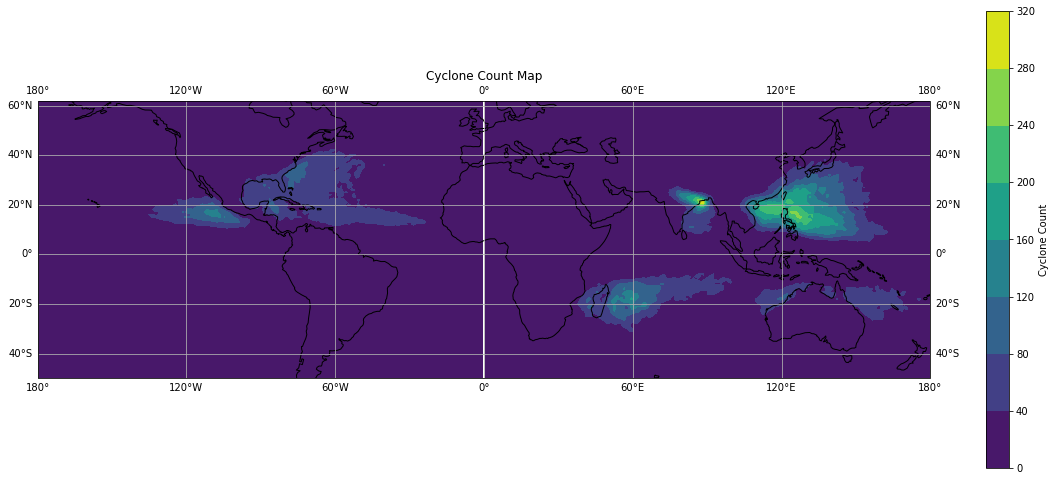

In [5]:
# Create a plot
plt.figure(figsize=(20, 12))

# Create a map projection
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot the data
plt.contourf(lon, lat, cyclone_count, cmap='viridis', transform=ccrs.PlateCarree())
plt.colorbar(label='Cyclone Count', shrink=0.7)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Cyclone Count Map')

# Customize the plot with coastlines and gridlines
ax.coastlines()
ax.gridlines(draw_labels=True)

# Show the plot
plt.show()

Do our results meet our expectations of where most tropical cyclones occur according to the __[article](https://mynasadata.larc.nasa.gov/basic-page/hurricane-dynamics#:~:text=Credit%3A%C2%A0%20NASA%20SpacePlace)__? Explain.

#### References

__[NASA Earth System Data Explorer](https://mynasadata.larc.nasa.gov/EarthSystemLAS/UI.vm)__

__[Cartopy Documentation: Using cartopy with matplotlib](https://cartopy-pelson.readthedocs.io/en/readthedocs/matplotlib/intro.html)__

__[Xarray Documentation: Reading and Writing Files](https://docs.xarray.dev/en/stable/user-guide/io.html)__

__[Making Maps Using Cartopy](https://kpegion.github.io/Pangeo-at-AOES/examples/cartopy-tutorial.html)__